In [1]:
# data
import pandas as pd
import numpy as np

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

# styling
%matplotlib inline
sns.set_theme(style="dark")
mpl.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

In [2]:
df=pd.read_csv('ds_salaries.csv')

In [3]:
df.drop(df[['salary_currency', 'salary', 'Unnamed: 0']], axis=1, inplace=True)

In [4]:
df.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M


In [5]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## 2. Univariate Analysis 

### 2.1 Categorical Columns

### 2.1.1. Experience Level

In [6]:
df['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

EN: Entry-level/Junior  
MI: Mid-level/Intermediate  
SE: Senior-level/Expert  
EX: Executive-level/Director

In [7]:
df['experience_level']=df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level']=df['experience_level'].replace('ME','Mid-level/Intermediate')
df['experience_level']=df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level']=df['experience_level'].replace('EX','Executive-level/Director')


In [8]:
ex_level = df['experience_level'].value_counts()
fig = px.treemap(
    values= ex_level.values,
    path=[ex_level.index],
    title='Experience Level',
    color= ex_level.index,
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    template='plotly_dark',
    width=1000, height=500)

percent=np.round((100*ex_level.values/sum(ex_level.values)).tolist(),2)
fig.data[0].customdata=[35.09, 46.13, 4.28, 14.5]
fig.data[0].texttemplate='%{label}<br>%{value}<br>%{customdata}%'

fig.update_layout(font=dict(size=19, family='Franklin Gothic'))
fig.show()

c:\Users\Windows 10\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


### 2.1.2. Job Titles

__How many job titles in the dataset?__

In [9]:
df['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [10]:
df['job_title'].nunique()

50

There are 50 job titles in this dataset.

In [13]:
top10_job_titles=df['job_title'].value_counts()[:10]
fig=px.bar(
    y=top10_job_titles.values,
    x=top10_job_titles.index,
    color=top10_job_titles.index,
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    text=top10_job_titles.values,
    template='plotly_dark',
    title='Top 10 Job Title')

fig.update_layout(
    xaxis_title='Job Titles',
    yaxis_title='Count'
)

fig.show()

### 2.1.3. Employment Type

In [ ]:
df['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

There are 4 type here, each are:  
- PT: Part-time,
- FT: Full-time,
- CT: Contract,
- FL: Freelance

In [12]:
type_group = df['employment_type'].value_counts()
e_type=['Full-time', 'Part-time', 'Contract', 'Freelance']
fig=px.bar(
    y=type_group.values,
    x=e_type,
    color=type_group.index,
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    text=type_group.values,
    template='plotly_dark',
    title='Employment Type Distribution')


fig.update_traces(width=0.3)
fig.update_layout(
    xaxis_title='Employment Type',
    yaxis_title='Count'
)

fig.show()

### 2.1.4. Employee Residence & Company Location

In [22]:
import country_converter as coco
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence']=converted_country

top10_employee_location= df['employee_residence'].value_counts()[:10]

In [26]:
fig=px.bar(
    y=top10_employee_location.values,
    x=top10_employee_location.index,
    color=top10_employee_location.index,
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    text=top10_employee_location.values,
    template='plotly_dark',
    title='Top 10 Location of Employee')


fig.update_traces(width=0.5)
fig.update_layout(
    xaxis_title='Location of Employee',
    yaxis_title='Count'
)

fig.show()

### 2.1.5. Company size

In [28]:
company_size= df['company_size'].value_counts()
fig=px.bar(
    y=company_size.values,
    x=company_size.index,
    color=company_size.index,
    color_discrete_sequence=px.colors.sequential.PuBuGn,
    text=company_size.values,
    template='plotly_dark',
    title='Distribution of Company size')


fig.update_traces(width=0.3)
fig.update_layout(
    xaxis_title='Company size',
    yaxis_title='Count'
)

fig.show()

## 2.2. Explore Numeric Columns

We have 3 numeric columns, each are:  
1. work_year
2. salary_in_usd
3. remote_ratio

In [31]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
work_year,607.0,2021.41,0.69,2020.0,2021.0,2022.0,2022.0,2022.0
salary_in_usd,607.0,112297.87,70957.26,2859.0,62726.0,101570.0,150000.0,600000.0
remote_ratio,607.0,70.92,40.71,0.0,50.0,100.0,100.0,100.0


In [32]:
df.corr()

,work_year,salary_in_usd,remote_ratio
work_year,1.000000,0.170493,0.076314
salary_in_usd,0.170493,1.000000,0.132122
remote_ratio,0.076314,0.132122,1.000000


### 2.2.1. Work Year

In [38]:
wkyear=df['work_year'].value_counts()
fig=px.pie(values=wkyear.values,
            names=wkyear.index,
            color_discrete_sequence=px.colors.sequential.PuBuGn,
            title='Work Year Distribution', template='plotly_dark')
fig.update_traces(textinfo='label+percent+value')
fig.data[0].marker.line.width=2
fig.update_layout(
    font=dict(size=15, family='Franklin Gothic')
)
fig.show()


### 2.2.2. Salary in USD

In [41]:
hist_data = [df['salary_in_usd']]
group_label = ['salary_in_usd']
fig = px.box(y=df['salary_in_usd'], template='plotly_dark', title='Salary_in_USD')
fig.update_layout(
    font=dict(size=15, family='Franklin Gothic'))

fig.show()



We can see that salary mostly distributed between 100k and 150k.

### 2.2.3. Remote Ratio

In [42]:
df['remote_ratio'].unique()

array([  0,  50, 100], dtype=int64)

Remote Ratio consists of 3 values: 0, 50, 100.  
0: No remote work  
50: Partially remote  
100: Fully remote

In [46]:
remote_ratio = df['remote_ratio'].value_counts()
re_type=['Fully Remote', 'No Remote Work','Partially Remote']
fig=px.bar(
    y=remote_ratio.values,
    x=re_type,
    color=re_type,
    color_discrete_sequence=px.colors.sequential.dense,
    text=remote_ratio.values,
    template='plotly_dark',
    title='Remote Ratio Distribution')


fig.update_traces(width=0.2)
fig.update_layout(
    xaxis_title='Remote Type',
    yaxis_title='Count',
    font=dict(size=17, family='Franklin Gothic')
)

fig.show()

318 emplyee are full remoted, and the next ranked is No renote work, with count of 127.

In [56]:
year_remote=df.groupby(['work_year', 'remote_ratio'])['remote_ratio'].count()
print(year_remote)

work_year  remote_ratio
2020       0                15
           50               21
           100              36
2021       0                34
           50               66
           100             117
2022       0                78
           50               12
           100             228
Name: remote_ratio, dtype: int64


Ca 3 nam, ty le remote fully deu cao nhat.

In [60]:
year_remo_ratio = df.groupby(['work_year', 'remote_ratio']).size()
fig = go.Figure(data=[
    go.Bar(name='2020', x=year_remo_ratio['2020'].index, y=year_remo_ratio['2020'].values, text=year_remo_ratio['2020'].values, marker_color='white'),
    go.Bar(name='2021', x=year_remo_ratio['2021'].index, y=year_remo_ratio['2021'].values, text=year_remo_ratio['2021'].values, marker_color='blue'),
    go.Bar(name='2022', x=year_remo_ratio['2022'].index, y=year_remo_ratio['2022'].values, text=year_remo_ratio['2022'].values, marker_color='gray')
])
fig.update_layout(
    xaxis_title='Remote ratio by Year',
    font=dict(size=17, family='Franklin Gothic'), template='plotly_dark')
fig.show()

KeyError: '2020'

## 3. Experience Level Analysis

__Employment type by Experience Level__

In [65]:
exlevel_type=df.groupby(['experience_level','employment_type']).size()

fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=exlevel_type['Entry-level/Junior'].index, y=exlevel_type['Entry-level/Junior'].values,
        text=exlevel_type['Entry-level/Junior'].values, marker_color='white'),
    go.Bar(name='Executive-level/Director', x=exlevel_type['Executive-level/Director'].index, y=exlevel_type['Executive-level/Director'].values,
    text=exlevel_type['Executive-level/Director'].values, marker_color='red'),
    go.Bar(name='Mid-level/Intermediate', x=exlevel_type['MI'].index, y=exlevel_type['MI'].values,
    text=exlevel_type['MI'].values, marker_color='gray'),
    go.Bar(name='Senior-level/Expert', x=exlevel_type['Senior-level/Expert'].index, y=exlevel_type['Senior-level/Expert'].values,
    text=exlevel_type['Senior-level/Expert'].values, marker_color='blue'),
])
fig.update_layout(
    xaxis_title='Experience Level with Employment Type',
    font=dict(size=17, family='Franklin Gothic'), template='plotly_dark')
fig.show()


In [62]:
year_remo_ratio = df.groupby(['work_year', 'remote_ratio']).size()
year_remo_ratio

work_year  remote_ratio
2020       0                15
           50               21
           100              36
2021       0                34
           50               66
           100             117
2022       0                78
           50               12
           100             228
dtype: int64

__Top 3 Job Title by Experience Level__

In [69]:
exlevel_job = df.groupby(['experience_level', 'job_title']).size()
entry_top3 = exlevel_job['Entry-level/Junior'].sort_values(ascending=False)[:3]
executive_top3 = exlevel_job['Executive-level/Director'].sort_values(ascending=False)[:3]
mid_top3 = exlevel_job['MI'].sort_values(ascending=False)[:3]
senior_top3 = exlevel_job['Senior-level/Expert'].sort_values(ascending=False)[:3]


In [73]:
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=entry_top3.index, y=entry_top3.values, text=entry_top3.values, marker_color='white'),
    go.Bar(name='Executive-level/Director', x=executive_top3.index, y=executive_top3.values, text=executive_top3.values, marker_color='gray'),
    go.Bar(name='Mid-level/Intermediate', x=mid_top3.index, y=mid_top3.values, text=mid_top3.values, marker_color='red'),
    go.Bar(name='Senior-level/Expert', x=senior_top3.index, y=senior_top3.values, text=senior_top3.values, marker_color='blue'),
])
fig.update_traces(width=0.4)
fig.update_layout(barmode='stack', title='Experience Level with top 3 job title', template='plotly_dark')
fig.show()


## 5. Salaries Analysis

__What are the salaries of Data Science jobs based on experience level?__

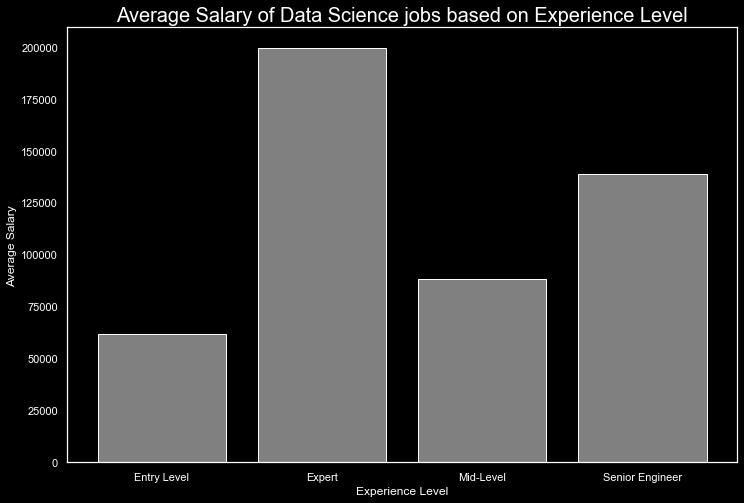

In [81]:
avg_sal_per_exp=df.groupby('experience_level')['salary_in_usd'].mean()

plt.figure(figsize=(12,8))
plt.bar(avg_sal_per_exp.index, avg_sal_per_exp.values,color='gray')
xticks = ['Entry Level', 'Expert', 'Mid-Level', 'Senior Engineer']
xticks_loc = range(len(xticks))
plt.xticks(xticks_loc, xticks)
plt.ylabel('Average Salary')
plt.xlabel('Experience Level')
plt.title('Average Salary of Data Science jobs based on Experience Level', size=20);